In [ ]:
!pip install pandas numpy textblob nltk openpyxl

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test sentence."))

# Load dataset
file_path = "/content/combined dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="webscrape_dataset")

# Select relevant columns
df = df[['Source.Name', 'Column5']].copy()
df.columns = ['Source', 'Content']

# Remove header-like rows
df = df[~df['Content'].str.lower().str.contains('content', na=False)]
df.dropna(subset=['Content'], inplace=True)


def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    return ' '.join(words)



df['Cleaned_Content'] = df['Content'].apply(preprocess_text)

# Sentiment Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply Sentiment Analysis
df['Sentiment'] = df['Cleaned_Content'].apply(analyze_sentiment)

# Display results
print(df[['Source', 'Sentiment']].head())

# Save cleaned dataset
df.to_csv("cleaned_webscrape_sentiment.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_webscrape_sentiment.csv'")


['This', 'is', 'a', 'test', 'sentence', '.']
                                 Source Sentiment
1  businessinsider_article_detailed.csv  Positive
3           ecommerecebytes_article.csv  Negative
5                     forbes_random.csv  Negative
7               retaildive_article2.csv  Negative
9               the_sun_article (1).csv  Positive
✅ Cleaned dataset saved as 'cleaned_webscrape_sentiment.csv'


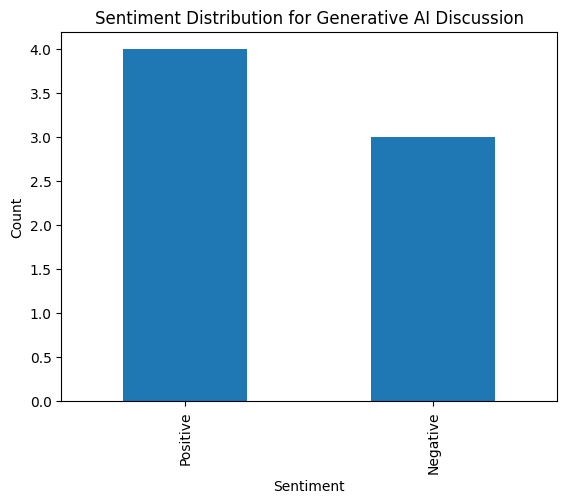

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/cleaned_webscrape_sentiment.csv'
df = pd.read_csv(file_path)  # Load the file into a DataFrame
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution for Generative AI Discussion')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

                                 Source  \
0  businessinsider_article_detailed.csv   
1           ecommerecebytes_article.csv   
2                     forbes_random.csv   
3               retaildive_article2.csv   
4               the_sun_article (1).csv   

                                             Content  \
0  Shopping looks a little different these days.B...   
1  Sponsored Link\nOnline Shopping Memberships: W...   
2  No, we're not talking about dancing avatars in...   
3  As consumers and retail leaders alike observe ...   
4  FOR some people, trying on clothes is a drag.\...   

                                     Cleaned_Content Sentiment  
0  shopping looks little different daysbrickandmo...  Positive  
1  sponsored link online shopping memberships wal...  Negative  
2  talking dancing avatars virtual malls retail i...  Negative  
3  consumers retail leaders alike observe fiveyea...  Negative  
4  people trying clothes drag picking items waiti...  Positive  
Accuracy: 0.33

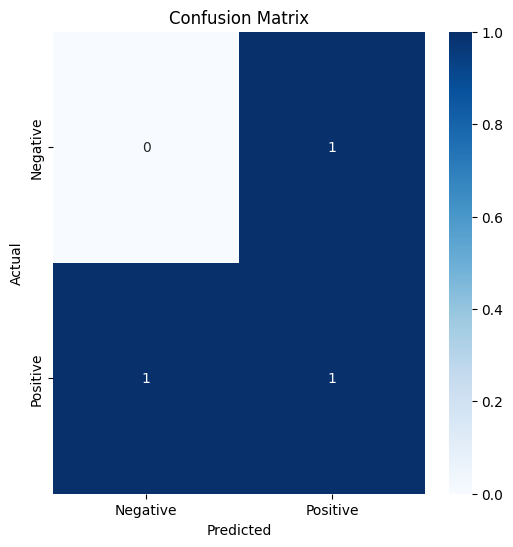

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load your cleaned dataset (make sure to adjust the path to your file)
df = pd.read_csv("/content/cleaned_webscrape_sentiment.csv")

# You should already have a 'Cleaned_Text' column and a 'Sentiment' column after preprocessing.
# Ensure these columns exist:
print(df.head())

# Splitting the dataset into features (X) and target (y)
X = df['Cleaned_Content']  # Feature: cleaned text
y = df['Sentiment']     # Target: sentiment (positive/negative/neutral)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_vect = vectorizer.transform(X_test)  # Transform the test data

# Initialize and train the Naive Bayes model (MultinomialNB)
model = MultinomialNB()
model.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vect)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

